In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv("BPEI_nanoparticles_synthetic.csv")
df.head()

,MW_BPEI,BPEI_conc,N/P_ratio,Crosslinker_type,Crosslinker_conc,Solvent,pH,Temp,Ionic_strength,Stirring_speed,Reaction_time,Size_nm,Zeta_mV
0,25,1.30,7,PEG-diacrylate,0.09,Ethanol,7.4,28,15,586,30,130.5,49.9
1,10,1.01,14,Glutaraldehyde,0.10,Ethanol,7.4,26,13,583,28,122.0,51.6
2,25,2.22,7,Glutaraldehyde,0.07,Water,7.3,26,14,458,21,136.3,50.6
3,25,2.06,7,PEG-diacrylate,0.09,Ethanol,7.0,26,13,508,31,159.8,46.6
4,10,2.09,8,Glutaraldehyde,0.06,Water,6.9,30,19,597,22,158.6,41.6


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MW_BPEI           100 non-null    int64  
 1   BPEI_conc         100 non-null    float64
 2   N/P_ratio         100 non-null    int64  
 3   Crosslinker_type  100 non-null    object 
 4   Crosslinker_conc  100 non-null    float64
 5   Solvent           100 non-null    object 
 6   pH                100 non-null    float64
 7   Temp              100 non-null    int64  
 8   Ionic_strength    100 non-null    int64  
 9   Stirring_speed    100 non-null    int64  
 10  Reaction_time     100 non-null    int64  
 11  Size_nm           100 non-null    float64
 12  Zeta_mV           100 non-null    float64
dtypes: float64(5), int64(6), object(2)
memory usage: 10.3+ KB


In [93]:
df.describe()

,MW_BPEI,BPEI_conc,N/P_ratio,Crosslinker_conc,pH,Temp,Ionic_strength,Stirring_speed,Reaction_time,Size_nm,Zeta_mV
count,100.00000,100.00000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,16.45000,1.71630,9.240000,0.083300,7.14400,27.510000,12.80000,497.440000,28.530000,148.068000,46.932000
std,6.12558,0.43181,3.071932,0.021084,0.19505,1.702612,4.53939,57.273633,5.828275,15.013024,4.239828
min,10.00000,1.01000,5.000000,0.050000,6.80000,25.000000,5.00000,400.000000,20.000000,116.700000,37.100000
25%,10.00000,1.36000,7.000000,0.067500,7.00000,26.000000,9.00000,457.000000,24.000000,136.750000,43.900000
50%,15.00000,1.73500,9.000000,0.085000,7.20000,27.000000,13.00000,493.500000,27.000000,149.900000,47.200000
75%,25.00000,2.09000,12.000000,0.100000,7.30000,29.000000,17.00000,541.250000,33.000000,159.275000,49.825000
max,25.00000,2.48000,15.000000,0.120000,7.40000,30.000000,20.00000,597.000000,40.000000,179.800000,56.400000


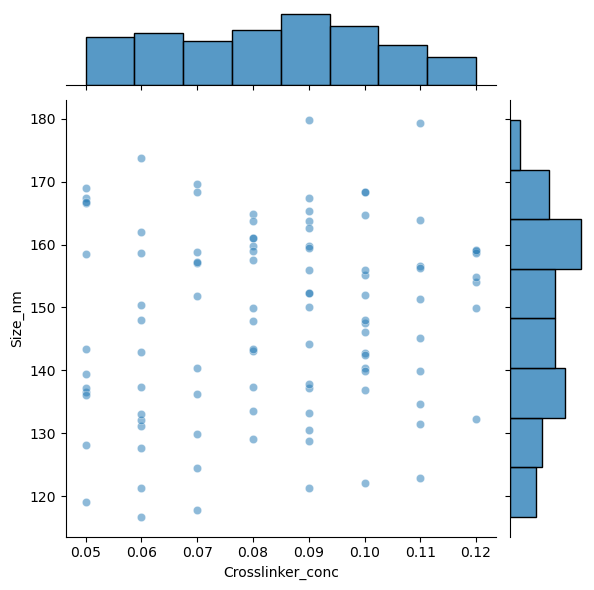

In [94]:
#EDA

sns.jointplot(x="Crosslinker_conc", y="Size_nm",data=df,alpha=0.5)

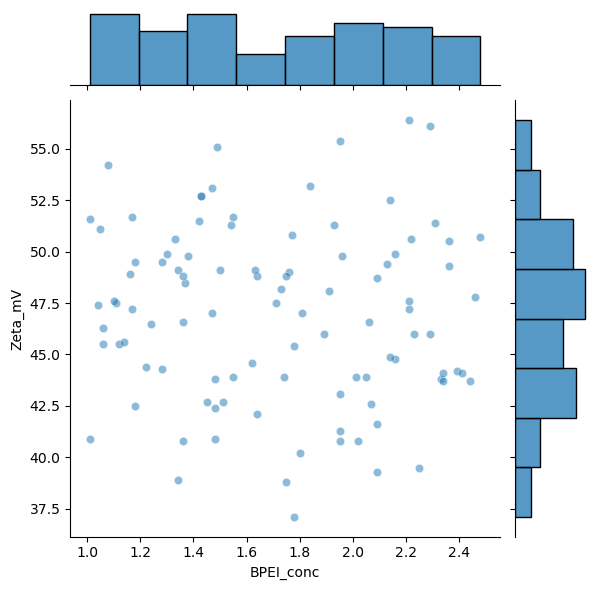

In [95]:
sns.jointplot(x="BPEI_conc", y="Zeta_mV",data=df,alpha=0.5)

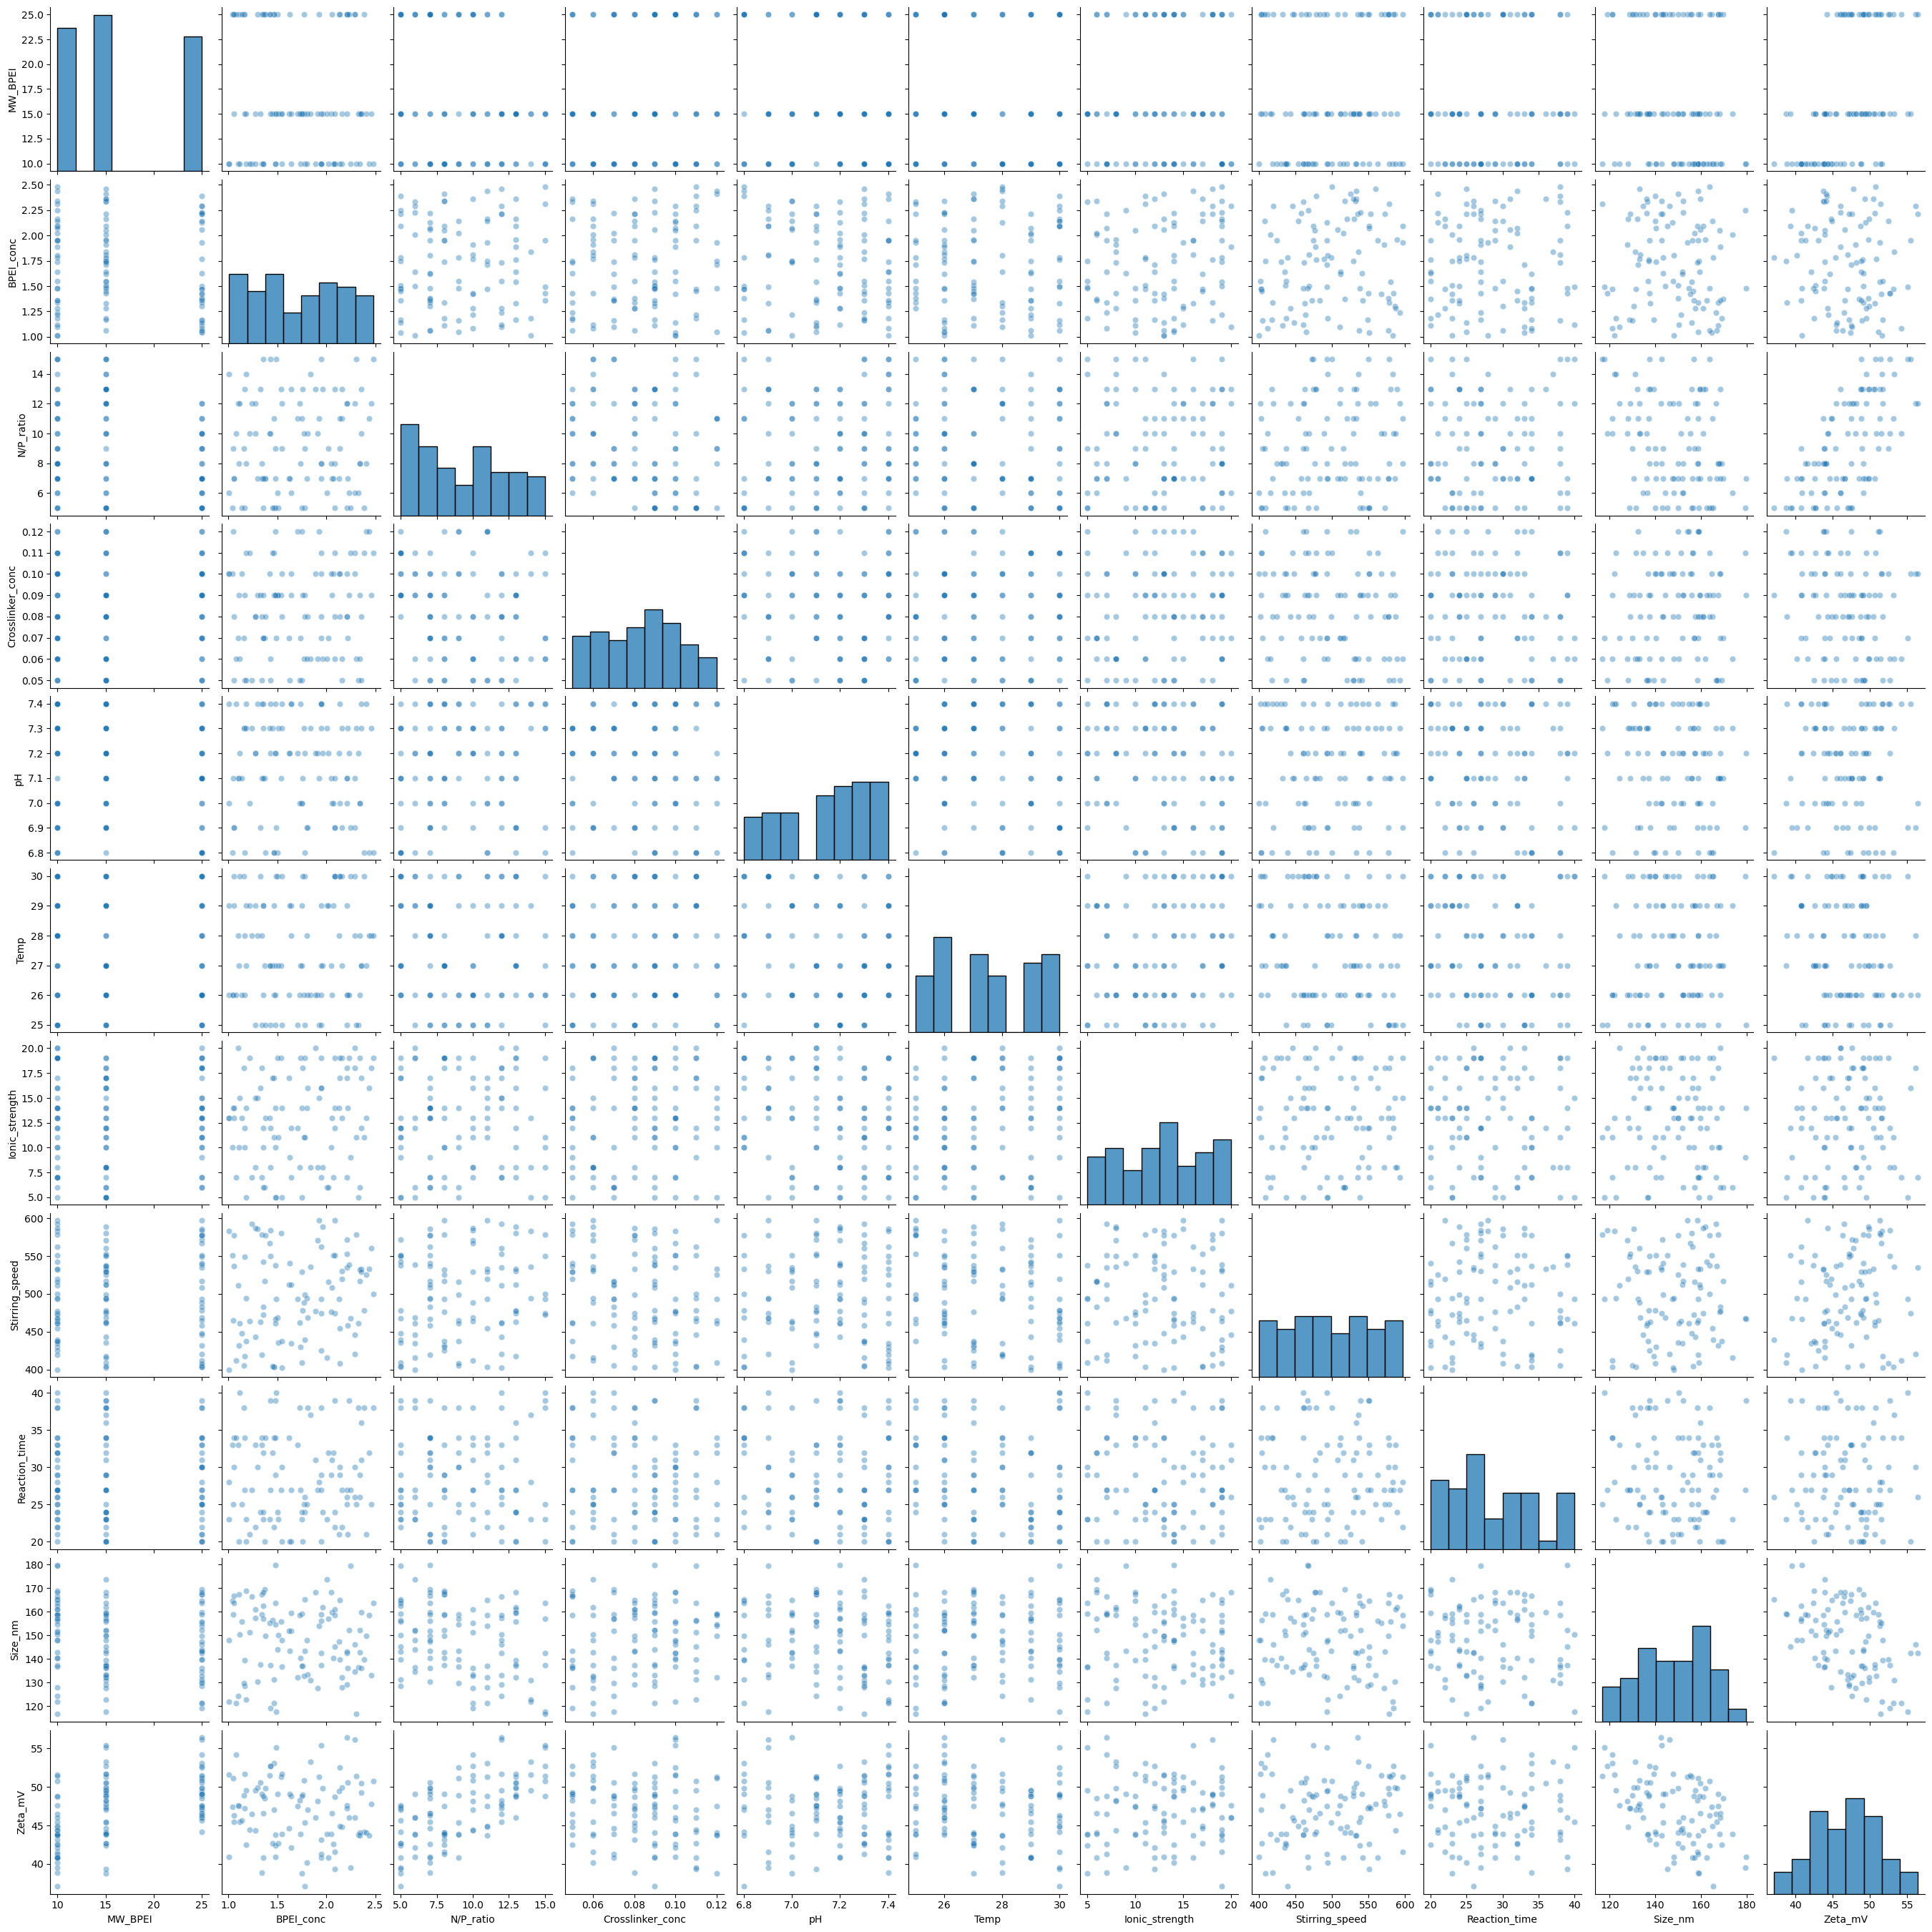

In [96]:
sns.pairplot(df, kind='scatter',plot_kws={'alpha':0.4})

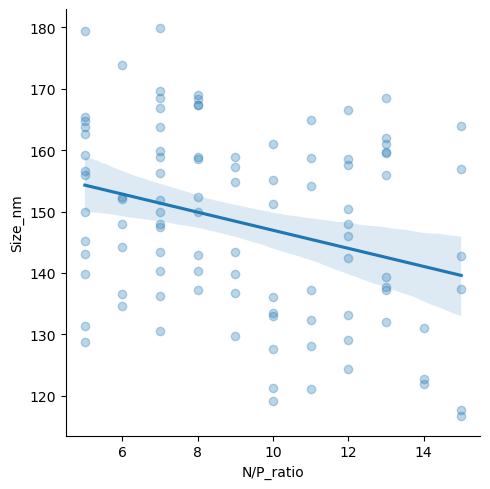

In [97]:
sns.lmplot(
    x='N/P_ratio',
    y='Size_nm',
    data=df,
    scatter_kws={'alpha': 0.3}
)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X = df[['MW_BPEI', 'BPEI_conc', 'N/P_ratio', 'Crosslinker_conc', 'pH','Temp','Ionic_strength','Stirring_speed','Reaction_time']]
Y = df[['Size_nm','Zeta_mV']]

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

In [101]:
#training the model
from sklearn.linear_model import LinearRegression 

In [102]:
lm = LinearRegression()

In [103]:
lm.fit(X_train, Y_train)

LinearRegression()

In [104]:
# the coefficients
lm.coef_
cdf = pd.DataFrame(lm.coef_.T, index=X.columns, columns=Y.columns)
print(cdf)

                   Size_nm    Zeta_mV
MW_BPEI          -0.628119   0.464694
BPEI_conc        -6.875716  -0.505572
N/P_ratio        -1.890730   1.010911
Crosslinker_conc -6.081744 -12.429758
pH               -9.981579   1.238238
Temp             -0.865076   0.040562
Ionic_strength   -0.214041   0.021192
Stirring_speed    0.009651   0.001151
Reaction_time    -0.333742   0.008264


In [105]:
#predictions
predictions = lm.predict(X_test)
predictions

array([[134.23193094,  48.69190894],
       [154.51130722,  41.91621164],
       [153.63931146,  48.31079588],
       [147.14436456,  46.42889504],
       [140.11309967,  49.7095987 ],
       [146.43095156,  52.11545877],
       [137.46161457,  51.28758424],
       [148.64142681,  48.70585138],
       [140.82439905,  51.96648036],
       [146.53812243,  49.11125969],
       [145.5897768 ,  47.41261918],
       [136.93603769,  51.8271993 ],
       [135.99432741,  52.70280831],
       [133.24072606,  50.00261558],
       [150.39205165,  41.58949216],
       [154.00038466,  42.61857019],
       [147.19952123,  48.18652591],
       [142.98924906,  52.21022348],
       [148.20223629,  47.21806066],
       [143.28045874,  51.98253356],
       [141.44745328,  47.40643622],
       [149.61229581,  41.47465964],
       [155.63809377,  40.5715629 ],
       [139.0446265 ,  52.7437359 ],
       [144.97212693,  44.46901573],
       [143.64072656,  47.19351873],
       [150.94134406,  47.41283539],
 

In [106]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

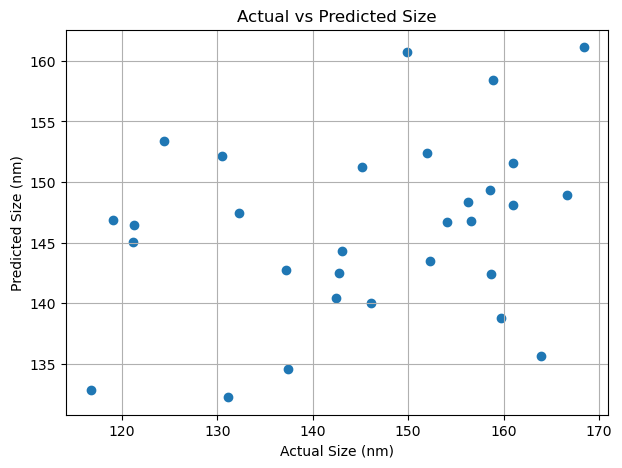

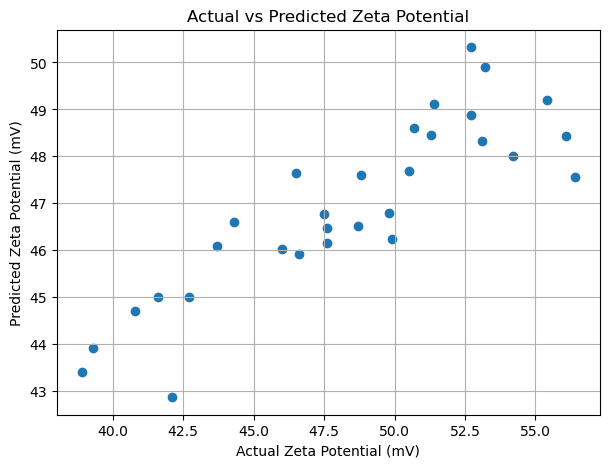

In [107]:
Y_pred = model.predict(X_test)
plt.figure(figsize=(7,5))
plt.scatter(Y_test['Size_nm'], Y_pred[:, 0])
plt.xlabel('Actual Size (nm)')
plt.ylabel('Predicted Size (nm)')
plt.title('Actual vs Predicted Size')
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(Y_test['Zeta_mV'], Y_pred[:, 1])
plt.xlabel('Actual Zeta Potential (mV)')
plt.ylabel('Predicted Zeta Potential (mV)')
plt.title('Actual vs Predicted Zeta Potential')
plt.grid(True)
plt.show()



In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [109]:
print('Mean Absolute Error:',mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:',mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 6.914846278261186
Mean Squared Error: 114.54287406801167
Root Mean Squared Error: 10.702470465645382


<Axes: ylabel='Count'>

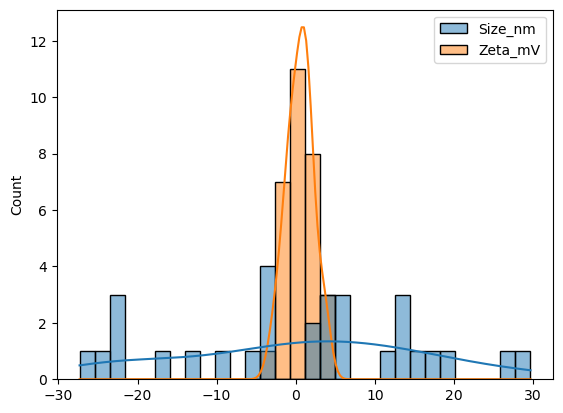

In [110]:
#residuals
residuals = Y_test-predictions
sns.histplot(residuals, bins=30, kde=True)

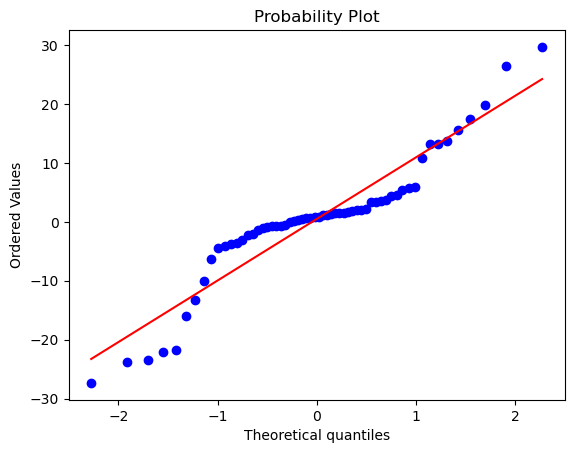

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


residuals = np.array(residuals).flatten()  
residuals = residuals.astype(float)        


stats.probplot(residuals, dist="norm", plot=plt)



plt.show()

